In [1]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

In [3]:
feature = iris['data']
target = iris['target']
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)
x_train.shape

(120, 4)

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(x_train,y_train)

In [11]:
y_pred = knn.predict(x_test)

In [12]:
print(y_test)
print(y_pred)

[2 0 1 1 1 2 2 1 0 0 2 2 0 2 2 0 1 1 2 0 0 2 1 0 2 1 1 1 0 0]
[2 0 1 1 1 1 2 1 0 0 2 1 0 2 2 0 1 1 2 0 0 2 2 0 2 1 1 1 0 0]


In [13]:
knn.score(x_test,y_test)

0.9

In [14]:
knn.predict([[6.1,3.1,4.7,2.1]])

array([2])

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [22]:
adult = pd.read_csv('adult.data',header=None)

In [23]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
adult.columns 

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [36]:
feature = adult[[0,4,6,12]]
target = adult[14]

In [37]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.1,random_state=20)
occ_one_hot = pd.get_dummies(x_train[6])
x_train = pd.concat([x_train,occ_one_hot],axis=1).drop(6,axis=1)
occ_one_hot_text = pd.get_dummies(x_test[6])
x_test = pd.concat([x_test,occ_one_hot_text],axis=1).drop(6,axis=1)

In [40]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.763586122198342

In [45]:
df = pd.read_csv('datingTestSet.txt',header=None,sep='\s+')
df

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike
...,...,...,...,...
995,11145,3.410627,0.631838,smallDoses
996,68846,9.974715,0.669787,didntLike
997,26575,10.650102,0.866627,largeDoses
998,48111,9.134528,0.728045,largeDoses


In [46]:
feature = df[[0,1,2]]
target = df[3]

In [50]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)
x_train

,0,1,2
983,9493,6.724021,0.563044
337,15941,0.000000,0.061191
434,81046,15.833048,1.568245
193,52914,3.976796,1.043109
437,39299,6.325139,0.605109
...,...,...,...
707,29241,7.791833,1.111416
630,7052,2.633627,1.097866
323,67705,6.038620,1.509646
392,56557,11.746200,1.695517


In [48]:
x_train.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [52]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
m_x_train = mm.fit_transform(x_train)
m_x_train

array([[0.10400666, 0.32142592, 0.33162236],
       [0.17465187, 0.        , 0.03543224],
       [0.88795153, 0.75686141, 0.92488496],
       ...,
       [0.74178563, 0.28866195, 0.89030024],
       [0.61964655, 0.56149931, 1.        ],
       [0.13440996, 0.26364057, 0.14719768]])

In [53]:
m_x_test = mm.transform(x_test)

In [54]:
scores = []
ks = []
for i in range(3,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(m_x_train,y_train)
    scores.append(knn.score(m_x_test,y_test))
    ks.append(i)


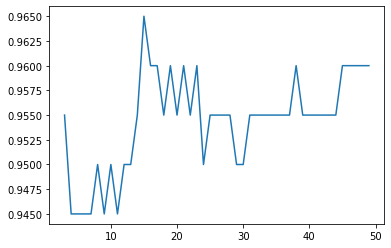

In [57]:
import matplotlib.pyplot as plt
plt.plot(np.array(ks),np.array(scores))

In [59]:
np.array(scores).argmax()

12

In [60]:
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
feature = iris.data
target = iris.target


In [61]:
cross_val_score_k = cross_val_score(knn,x_train,y_train,cv=5)

In [65]:
cross_val_score_k.mean()

0.8175000000000001

0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9733333333333333
0.9666666666666667
0.9733333333333333
0.96
0.9733333333333333
0.98
0.9733333333333333
0.9666666666666667
0.9733333333333333
0.9733333333333333
0.9733333333333333
0.9666666666666667
0.9666666666666667


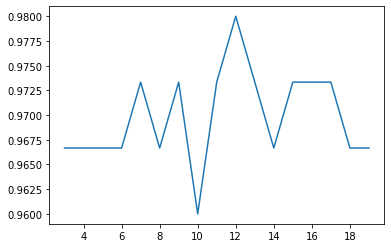

In [68]:
scores = []
kn = []
for i in range(3,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,feature,target,cv=6).mean()
    print(score)
    kn.append(i)
    scores.append(score)
plt.plot(kn,scores)

In [71]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier(n_neighbors=5)
print(cross_val_score(knn,feature,target,cv=10).mean())
lr = LogisticRegression()
print(cross_val_score(lr,feature,target,cv=10).mean())


0.9666666666666668
0.9733333333333334


In [73]:
from numpy import array
from sklearn.model_selection import KFold
data = array([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
kfload = KFold(n_splits=3,shuffle=True,random_state=1)
for train,test in kfload.split(data):
    print(train,test)

[0 3 4 5] [1 2 6]
[1 2 3 5 6] [0 4]
[0 1 2 4 6] [3 5]


In [74]:
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X,y = iris.data,iris.target
knn = KNeighborsClassifier(n_neighbors=5)
n_floads = 5
kf = KFold(n_floads,shuffle=True,random_state=42).get_n_splits(X)
scores = cross_val_score(knn,X,y,cv=kf)
scores.mean()

0.9733333333333334

In [75]:
import numpy as np
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt
dic = {
    '面积':[55,76,80,100,120,150],
    '售价':[110,152,160,200,240,300]
}
df = DataFrame(data=dic)
df

,面积,售价
0,55,110
1,76,152
2,80,160
3,100,200
4,120,240
5,150,300


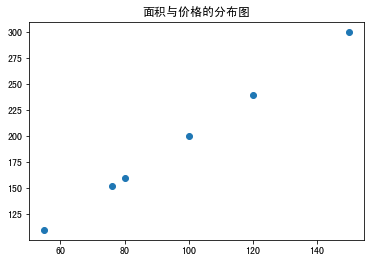

In [79]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.title("面积与价格的分布图")
plt.scatter(df['面积'],df['售价'])


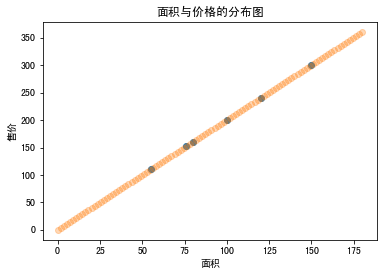

In [80]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.title("面积与价格的分布图")
plt.xlabel('面积')
plt.ylabel('售价')
plt.scatter(df['面积'],df['售价'])
plt.scatter(np.linspace(0,180,num=100),np.linspace(0,180,num=100)*2,alpha=0.3)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch

In [85]:
feature = fch().data
target = fch().target

In [90]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [91]:
lr.coef_

array([ 4.40832770e-01,  9.61642244e-03, -1.14781227e-01,  6.75973842e-01,
       -5.10337874e-06, -3.47558983e-03, -4.19478386e-01, -4.32477249e-01])

In [92]:
lr.intercept_

-36.779443105944495

In [96]:
[*zip(fch().feature_names,lr.coef_)]

[('MedInc', 0.44083277039517),
 ('HouseAge', 0.009616422444042433),
 ('AveRooms', -0.11478122746959646),
 ('AveBedrms', 0.675973842315124),
 ('Population', -5.1033787396040516e-06),
 ('AveOccup', -0.003475589832444126),
 ('Latitude', -0.4194783856769445),
 ('Longitude', -0.4324772490416929)]

In [97]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr.predict(x_test),y_test)

0.531397330705225

In [98]:
y_test.max(),y_test.min()

(5.00001, 0.14999)

In [109]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x_train,y_train,cv=5,scoring='neg_mean_squared_error').mean()

-0.5309250456411233

In [106]:
from  sklearn.metrics import r2_score
r2_score(lr.predict(x_test),y_test)

0.36722511699081284

In [107]:
cross_val_score(lr,x_train,y_train,cv=5,scoring='r2').mean()

0.5996005491757248

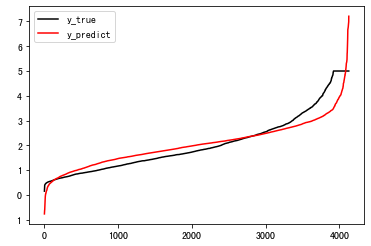

In [108]:
import matplotlib.pyplot as plt
y_pred = lr.predict(x_test)
plt.plot(range(len(y_test)),sorted(y_test),c='black',label='y_true')
plt.plot(range(len(y_pred)),sorted(y_pred),c='red',label='y_predict')
plt.legend()
plt.show()

In [110]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE,r2_score


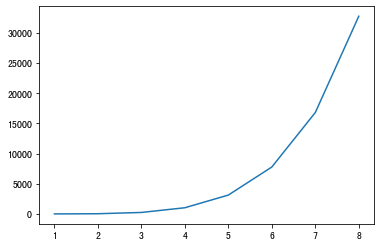

In [112]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1,2,3,4,5,6,7,8])
y = x**5
plt.plot(x,y)

In [113]:
x_train = [[6],[8],[10],[14],[18]]
y_train = [[7],[9],[13],[17.5],[18]]
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

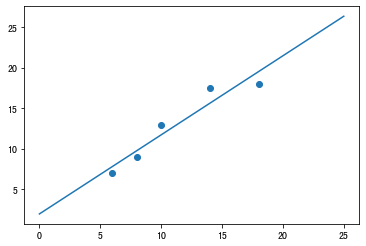

In [114]:
xx = np.linspace(0,25,100)
xx = xx.reshape(-1,1)
yy = regressor.predict(xx)
plt.scatter(x_train,y_train)
plt.plot(xx,yy)

In [115]:
from sklearn.preprocessing import PolynomialFeatures
c = [[5,10]]
pl = PolynomialFeatures()
b = pl.fit_transform(c)
b

array([[  1.,   5.,  10.,  25.,  50., 100.]])

In [116]:
ploy2 = PolynomialFeatures(degree=2)
x_train_ploy2 = ploy2.fit_transform(x_train)
regressor_ploy2 = LinearRegression()
regressor_ploy2.fit(x_train_ploy2,y_train)

LinearRegression()

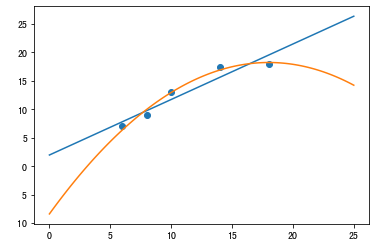

In [117]:
xx_ploy2 = ploy2.transform(xx)
yy_ploy2 = regressor_ploy2.predict(xx_ploy2)
plt.scatter(x_train,y_train)
plt.plot(xx,yy,label='Degree1')
plt.plot(xx,yy_ploy2,label='Degree2')

In [118]:
from sklearn.linear_model import Ridge
ploy3 = PolynomialFeatures(degree=3)
x_train_ploy3 = ploy3.fit_transform(x_train)
regressor_ploy3 = LinearRegression()
regressor_ploy3.fit(x_train_ploy3,y_train)
regressor_ploy3.coef_

array([[ 0.        , -1.42626096,  0.31320489, -0.01103344]])

In [123]:
regressor_ploy3 = Ridge(alpha=0.5)
regressor_ploy3.fit(x_train_ploy3,y_train)
regressor_ploy3.coef_

array([[ 0.        , -0.14579637,  0.19991159, -0.00792083]])

In [125]:
15542.93/0.015

1036195.3333333334

In [128]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
data = load_digits()

In [131]:
feature = data.data
target = data.target
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [133]:
nb.score(x_test,y_test)

0.825

In [136]:
nb.predict(x_test[5].reshape(1,-1))

array([7])

In [138]:
y_test[5]

7

In [140]:
nb.predict_log_proba(x_test[5].reshape(1,-1))

array([[-2159.49999845,  -126.31270235,  -560.27779246,  -705.95838254,
         -132.52975614,  -147.34752492, -2309.39014272,     0.        ,
         -124.8455896 ,  -186.69956776]])

In [143]:
nb.predict_log_proba(x_test[1].reshape(1,-1)),y_test[1]

(array([[-1.14020123e+03, -1.46649581e+02, -4.35237354e+01,
         -1.85076765e-07, -5.16530273e+02, -3.95085995e+01,
         -1.06830959e+03, -1.04988753e+08, -1.55136546e+01,
         -2.00035447e+01]]),
 3)

In [147]:
from sklearn.naive_bayes import MultinomialNB
import sklearn.datasets as datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
news = datasets.fetch_20newsgroups(subset='all')

In [149]:
feature = news.data
target = news.target
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2)
tf = TfidfVectorizer()
x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)

In [155]:
mlt = MultinomialNB(alpha=1)
mlt.fit(x_train,y_train)
y_pred = mlt.predict(x_test)
print(y_pred)
print(y_test)
print(mlt.score(x_test,y_test))


[ 1 13 14 ... 16  6  8]
[ 1 13 14 ... 18  6  8]
0.8506631299734748


In [157]:
from sklearn.datasets import load_digits
digits = load_digits()
X,y = digits.data,digits.target
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2020)

In [159]:
gnb = MultinomialNB()
gnb.fit(x_train,y_train)

MultinomialNB()

In [161]:
gnb.score(x_test,y_test)

0.9027777777777778

In [163]:
25*15

375

In [164]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split


In [176]:
data = load_breast_cancer()
X = data.data
y = data.target
lrl1 = LR(solver='liblinear',penalty='l1',C=0.5)
lrl2 = LR(penalty='l2',C=0.5)
lrl1.fit(X,y)
lrl2.fit(X,y)
print(lrl1.coef_)
print(lrl2.coef_)

[[ 3.16965435  0.025817   -0.06116835 -0.0121146   0.          0.
   0.          0.          0.          0.          0.          0.49978551
   0.         -0.07314706  0.          0.          0.          0.
   0.          0.          0.40276959 -0.23940383 -0.14282674 -0.01773809
   0.          0.         -2.36616357  0.          0.          0.        ]]
[[ 0.85391051  0.34258421  0.1811316  -0.00688211 -0.03271239 -0.15189691
  -0.21255443 -0.08985511 -0.04537026 -0.00907872  0.03799705  0.35767234
   0.14843562 -0.09829809 -0.00296733 -0.03206348 -0.04489054 -0.0116264
  -0.01092083 -0.00296699  0.90658485 -0.38436811 -0.16465437 -0.01893247
  -0.05924079 -0.47104987 -0.58606837 -0.17257341 -0.14305855 -0.04546251]]


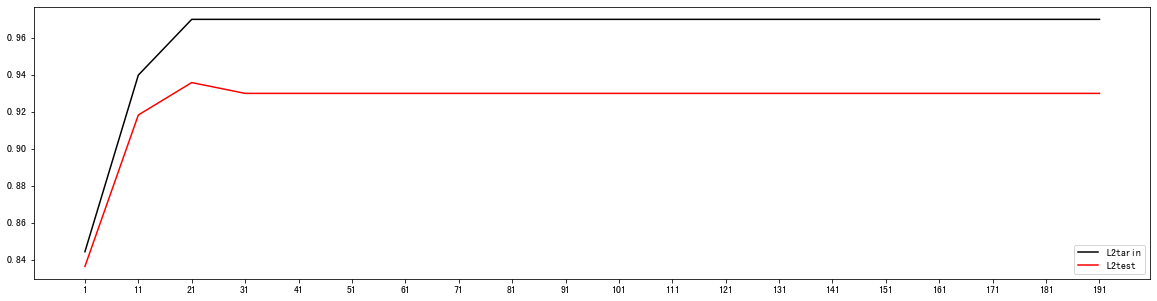

In [178]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
l2 = []
l2_test = []
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.arange(1,201,10):
    lrl2 = LR(penalty='l2',solver='liblinear',C=0.9,max_iter=i)
    lrl2.fit(x_train,y_train)
    l2.append(accuracy_score(lrl2.predict(x_train),y_train))
    l2_test.append(accuracy_score(lrl2.predict(x_test),y_test))
graph = [l2,l2_test]
color = ['black','red']
label = ['L2tarin','L2test']
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [180]:
import sklearn.datasets as ds
bc = ds.load_breast_cancer()
feature = bc.data
target = bc.target


In [183]:
feature[:,1].min(),feature[:,1].max()

(9.71, 39.28)

In [186]:
fea_bins = pd.cut(feature[:,1],bins=5,labels=range(5))
fea_bins.value_counts()

0    113
1    299
2    129
3     25
4      3
dtype: int64

In [188]:
gi = pd.crosstab(fea_bins,target)
gi

col_0,0,1
row_0,,
0,8,105
1,101,198
2,90,39
3,11,14
4,2,1


In [191]:
gb = pd.Series(target).value_counts()
gb

1    357
0    212
dtype: int64

In [194]:
gbi = (gi[1]/gi[0])/(gb[1]/gb[0])
gbi

row_0
0    7.794118
1    1.164157
2    0.257330
3    0.755793
4    0.296919
dtype: float64

In [196]:
woe = np.log(gbi)
woe

row_0
0    2.053369
1    0.151997
2   -1.357398
3   -0.279987
4   -1.214297
dtype: float64

In [197]:
dict = woe.to_dict()

In [198]:
dict

{0: 2.053369301370061,
 1: 0.15199700674564914,
 2: -1.3573975313082451,
 3: -0.27998745029073846,
 4: -1.214296687667572}

In [199]:
woe_bins = fea_bins.map(dict)
woe_bins

[2.053369, 0.151997, 0.151997, 0.151997, 2.053369, ..., -1.357398, -0.279987, -0.279987, -0.279987, -1.357398]
Length: 569
Categories (5, float64): [2.053369 < 0.151997 < -1.357398 < -0.279987 < -1.214297]

In [201]:
x = np.random.randint(0,100,size=(100,3))
y = pd.Series(data=np.random.randint(0,1,size=(95,)))
y = y.append(pd.Series(data=[1,1,1,1,1]),ignore_index=False).values
y = y.reshape(-1,1)
all_data_np = np.concatenate((x,y),axis=1)

In [203]:
np.random.shuffle(all_data_np)
df = pd.DataFrame(all_data_np)
df

,0,1,2,3
0,52,64,30,0
1,82,58,42,0
2,37,72,15,0
3,92,92,5,0
4,36,49,38,0
...,...,...,...,...
95,65,50,13,0
96,7,69,92,0
97,2,43,95,0
98,80,51,43,0


In [205]:
feature = df[[0,1,2]]
target = df[3
           ]

In [208]:
target.value_counts()

0    95
1     5
Name: 3, dtype: int64

In [209]:
from imblearn.over_sampling import SMOTE
s = SMOTE(k_neighbors=3)
s_feature,s_target = s.fit_sample(feature,target)

In [211]:
s_target.shape

(190,)

In [212]:
s_target.value_counts()

0    95
1    95
Name: 3, dtype: int64

In [213]:
from imblearn.under_sampling import RandomUnderSampler
r = RandomUnderSampler()
r_feature, r_target = r.fit_sample(feature,target)

In [216]:
r_target.shape

(10,)